# Introductory notebook

This notebook contains an informal and introductory illustration of some of the concepts that are key to differential geometry, through the lens of a physicist. We are going to study the torus (doughnut), and the trajectories that a freely moving particle would follow on its surface. That is, the motion is restricted to the surface of a torus, without any force otherwise. Of course, we could think of the particle as moving in $\mathbb{R}^3$ and subject to a force that takes the appropriate value to ensure that it remains on the surface of the torus. For a sketch of this alternative procedure, see [the final part of the notebook](#alternative-fictitious-force-method).

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

## Torus

The torus is an example of what we will later on call a differential manifold. Because it is a surface, it is furthermore a 2-dimensional example. Informally, 2-dimensional means that we can find a coordinate system for parts (patches) of the torus that identifies each point in the patch with 2 real numbers. We will see these concepts more in depth at some point; these intuitive notions should be enough for now. In the interactive 3D plot below, we can see the torus embedded in $\mathbb{R}^3$. We are looking at it "from a higher dimension", thus revealing its complete structure to our eyes. However, we should not let this natural picture fool us. The torus is not a 3-dimensional object: it is intrinsically 2-dimensional, and can be understood without any reference to additional dimensions. Of course, as far as visualization goes, a 3D picture of the torus is much easier on our eyes (and minds), us being 3-dimensional creatures.

To draw it, we have used two parameters $\theta$ and $\phi$, which we identify with the natural angles of the torus. $\phi$ is the angle that sweeps the large circle, with radius $a$, and $\theta$ sweeps the smaller circle, of radius $b$. Thus, the 3D Cartesian coordinates of the points that belong to the torus are
\begin{align*}
    x &= \left[a + b \sin(\theta) \right]\cos(\phi)\\
    y &= \left[a + b \sin(\theta) \right]\sin(\phi)\\
    z &= b \cos(\theta)
\end{align*}
You should try to convince yourself that this is indeed a natural parametrization of a torus.


(-1.4, 1.4)

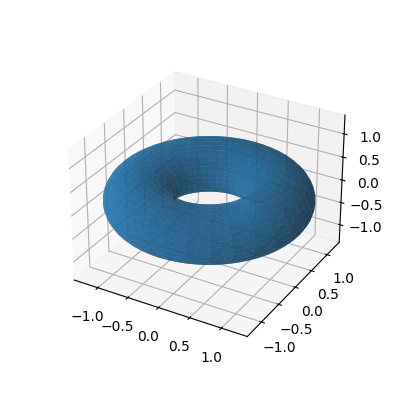

In [2]:
# coordinates
theta = np.reshape(np.linspace(0, 2 * np.pi, 61), (1, -1))
phi = np.reshape(np.linspace(0, 2 * np.pi, 61), (-1, 1))

# build points in R^3 as functions of the coordinates
a, b = 1, 0.5
x = np.cos(phi) * (a + b * np.sin(theta))
y = np.sin(phi) * (a + b * np.sin(theta))
z = b * np.cos(theta)

fig, ax = plt.subplots(1, 1, subplot_kw={"projection": "3d"}, figsize=(4, 4))

ax.plot_surface(x, y, z, alpha=0.7)
ax.set_xlim(-1.4, 1.4)
ax.set_ylim(-1.4, 1.4)
ax.set_zlim(-1.4, 1.4)

## Equations of motion of a free particle

The Lagrangian of a free particle is given by its kinetic energy. With our limited current knowledge of differential geometry, the most straightforward approach to calculate the kinetic energy is to obtain the squared norm of the velocity vector in terms of the parameters ($\phi$ and $\theta$):
\begin{align*}
    \dot{x} &= \left[b\cos(\theta) \dot{\theta}\right] \cos(\phi) - \left[a + b\sin(\theta)\right] \sin(\phi)\dot{\phi}, \\
    \dot{y} &= \left[b\cos(\theta) \dot{\theta}\right] \sin(\phi) + \left[a + b\sin(\theta)\right] \cos(\phi)\dot{\phi}, \\
    \dot{z} &= -b\sin(\theta)\dot{\theta}.
\end{align*}
Hence, 
\begin{equation*}
    ||\mathbf{v}||^2 = b^2 \dot{\theta}^2 + \left[a + b\sin(\theta)\right]^2 \dot{\phi}^2,
\end{equation*}
and the Lagrangian is, in terms of the generalized coordinates
\begin{equation*}
    L = \frac m2 \left[b^2 \dot{\theta}^2 + \left[a + b\sin(\theta)\right]^2 \dot{\phi}^2\right] 
    = \frac m2 \left(\dot{\theta}, \dot{\phi}\right) \begin{pmatrix}
        b^2 & 0 \\ 0 & \left[a + b\sin(\theta)\right]^2
    \end{pmatrix} \begin{pmatrix}
        \dot{\theta} \\ \dot{\phi}
    \end{pmatrix}.
\end{equation*}
In the second version, we have explicitly written out a matrix that will play a central role in the course: the metric. It tells us how to measure distances in our manifold as the parameters change. In this particular case, it makes intuitive sense too. When moving along $\theta$, we trace circles of radius $a$, while moving along $\phi$ yields circles of radius $a + b\sin(\theta)$. Notice that these quantities appear squared in the metric, which also makes sense because we have obtained them from the norm of the velocity squared. The metric has naturally appeared in front of us with this method. We will soon see how to more rigorously obtain it.


From the above expression, we can immediately recognize the presence of a cyclical coordinate in $\phi$, which does not appear in the Lagrangian. Thus, its canonically conjugate momentum will be a conserved quantity. Naturally, this is the conservation of angular momentum along the symmetry-axis of the torus. The equations of motion are obtained through the Euler-Lagrange equations:
\begin{align*}
    \frac{\mathrm{d}}{\mathrm{d}t}\frac{\partial L}{\partial \dot{\theta}} = \frac{\partial L}{\partial \theta} 
    &\implies
    b^2 \ddot{\theta} =  b\left[a + b\sin(\theta)\right]\cos(\theta) \dot{\phi}^2 \\
    \frac{\mathrm{d}}{\mathrm{d}t}\frac{\partial L}{\partial \dot{\phi}} = \frac{\partial L}{\partial \phi} 
    &\implies
    \frac{\mathrm{d}}{\mathrm{d}t}\left\{\left[a + b\sin(\theta)\right]^2 \dot{\phi}\right\} = 0.
\end{align*}
Further simplification yields:
\begin{align*}
    \ddot{\theta} &= \frac1b\left[a + b\sin(\theta)\right]\cos(\theta) \dot{\phi}^2 \\
    \ddot{\phi} &= \frac{-2b\cos(\theta)}{a + b\sin(\theta)} \dot{\theta} \dot{\phi} 
\end{align*}

This system of equations does not look very friendly from the lens of analytical integration, so we won't bother trying to solve them here. Instead, we will resort to numerical methods. In the code cell below, you can modify the `initial_conditions` array to plot different trajectories.

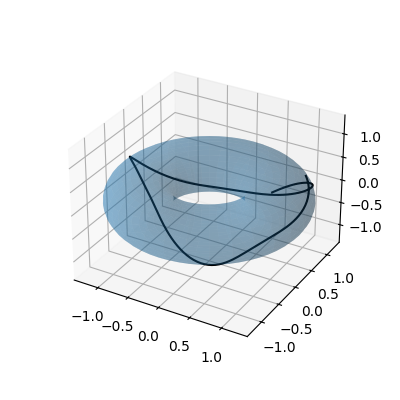

In [3]:
# 3d plotting of the surface
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": "3d"}, figsize=(4, 4))
ax.plot_surface(x, y, z, alpha=0.3)
ax.set_xlim(-1.4, 1.4)
ax.set_ylim(-1.4, 1.4)
ax.set_zlim(-1.4, 1.4)

# differential equations 
def dfdt(f, t):
    # turn the second order equations into first order equations
    # f is an array containing the coordinates and velocities
    # return the temporal derivatives using the equations of motion
    theta, phi, v_theta, v_phi = f
    return [v_theta,
            v_phi, 
            1 / b * (a + b * np.sin(theta)) * np.cos(theta) * v_phi**2,
            -2 * b * np.cos(theta) / (a + b * np.sin(theta)) * v_theta * v_phi]
    
# temporal evolution
time = np.linspace(0, 10, 300)
initial_conditions = np.array([0, 0, .7, 1])
sol = odeint(dfdt, initial_conditions, time)

# plot geodesic trajectory
x_geo = np.cos(sol[:, 1]) * (a + b * np.sin(sol[:, 0]))
y_geo = np.sin(sol[:, 1]) * (a + b * np.sin(sol[:, 0]))
z_geo = b * np.cos(sol[:, 0])

ax.plot(x_geo, y_geo, z_geo, "k")

## Observations

1. Because the particle is moving freely on the surface, the kinetic energy has to stay constant throughout its motion. There are no forces! Hence, $||\mathbf{v}||$ must be constant. Let us check it explicitly:
\begin{equation*}
    \frac{\mathrm{d}}{\mathrm{d}t} ||\mathbf{v}||^2 = \frac{\mathrm{d}}{\mathrm{d}t} \left[b^2 \dot{\theta}^2 + \left[a + b\sin(\theta)\right]^2 \dot{\phi}^2\right] = 2b^2 \dot{\theta} \ddot{\theta} + 2b\left[a + b\sin(\theta)\right]\cos(\theta)\dot{\theta} \dot{\phi}^2 + 2 \left[a + b\sin(\theta)\right]^2 \dot{\phi} \ddot{\phi},
\end{equation*}
where we can substitute the accelerations using the equations of motion:
\begin{align*}
    \frac{\mathrm{d}}{\mathrm{d}t} ||\mathbf{v}||^2 &= 2b^2 \dot{\theta} \left\{\frac1b\left[a + b\sin(\theta)\right]\cos(\theta) \dot{\phi}^2\right\} + 2b\left[a + b\sin(\theta)\right]\cos(\theta)\dot{\theta} \dot{\phi}^2 + 2 \left[a + b\sin(\theta)\right]^2 \dot{\phi} \left\{\frac{-2b\cos(\theta)}{a + b\sin(\theta)} \dot{\theta} \dot{\phi} \right\} \\
    &= 2b \left[a + b\sin(\theta)\right]\cos(\theta) \dot{\theta}\dot{\phi}^2 + 2b\left[a + b\sin(\theta)\right]\cos(\theta)\dot{\theta} \dot{\phi}^2 - 4b \left[a + b\sin(\theta)\right] \dot{\theta} \dot{\phi}^2 = 0
\end{align*}

2. Since $||\mathbf{v}||$ is constant, the arc length is essentially given by $||\mathbf{v}||\Delta t$. Chopping the trajectory into infinitesimal pieces, we have
\begin{equation*}
    s = \int_{t_0}^{t_1} \mathrm{d}t\ ||\mathbf{v}|| = \frac{2}{m ||\mathbf{v}||} \int_{t_0}^{t_1} \mathrm{d}t\ \frac m2 ||\mathbf{v}||^2 = k \int_{t_0}^{t_1} \mathrm{d}t\ L = k S
\end{equation*}
where we can extract the factor $\frac{2}{m ||\mathbf{v}||}$ because the speed is a constant, which we have renamed $k$. The trivial manipulation above shows a very neat fact: the trajectories of a free particle restricted to some surface, that is, those that extremize the action $S$ (usually minimize), also extremize the arc length $s$. After all, by using the Euler-Lagrange equations we are applying the calculus of variations to $S$, which we have shown to be proportional to the arc length. The reasoning is sort of backwards, because we first found that the speed is constant, and then used that to relate the action to the arc length. If we had started from the arc length of some curve and tried to find the curve that minimizes it, we would not generally reach the same equations of motion. Only if we impose that the parametrization has a constant velocity do we recover the same equations of motion (in the lingo, such parametrizations are called affine).

3. In general, and regardless of the parametrization, the trajectories that extremize the arc length are called geodesics. They are a generalization of straight lines for curved spaces. In some sense, they are as straight as anything can be on a curved space. This property is often used as the defining characteristic of geodesics. To remark the importance of geodesics, you may have heard that the motion accross space-time of free-falling test particles follows geodesics.

4. We have made no reference to $\mathbb{R}^3$ since we obtained the Lagrangian, as we have described the particle confined to the torus through the parametrization and its metric. However, we have the privilege of a 3-dimensional perspective, which allows us to think of the problem as embedded in $\mathbb{R}^3$ quite naturally. Thus, because the trajectories are curved, there is an acceleration in 3-dimensional space that prevents the particle from escaping the surface of the torus. This acceleration must be perpendicular to the velocity, otherwise the speed would not be constant. Furthermore, it can be shown that the acceleration is actually perpendicular to the plane tangent to the surface at the particle's position, not just to the velocity.

5. For nice visualizations of geodesics, visit [this website](https://analyticphysics.com/General%20Relativity/Visualizing%20Geodesics%20on%20Surfaces.htm).

## Alternative (fictitious force) method

We have seen how the trajectories of a free particle that lives on the surface of a torus are obtained by suitably choosing the appropriate generalized coordinates ($\theta$ and $\phi$). Now, just for fun, we sketch a different approach. Let us take the Lagrangian of a free particle in 3 dimensions and add a very peculiar potential:
\begin{equation*}
    L = \frac m2 \left(\dot{x}^2 + \dot{y}^2 + \dot{z}^2\right) - \lambda \left[\left(a - \sqrt{x^2 + y^2}\right)^2 + z^2 - b^2\right],
\end{equation*}
where the contents of the square bracket, when equal to 0, are an implicit equation for the torus. This potential will result in a force equal to
\begin{equation*}
    \mathbf{F} = -\nabla U = -\lambda\left(-2\frac{\left(a - \sqrt{x^2 + y^2}\right)x}{\sqrt{x^2 + y^2}}, -2\frac{\left(a - \sqrt{x^2 + y^2}\right)y}{\sqrt{x^2 + y^2}}, 2z\right),
\end{equation*}
which must be perpendicular to the surface of the torus. 
> It's obvious that this is the case, because the torus, defined by $U=0$, is a level surface of $U$ (or an equipotential surface). Thus, the gradient of $U$ cannot have components along the surface of $U$, because the gradient tells us the direction of growth.

The factor $\lambda$ is there to ensure that the magnitud of this force is precisely what it has to be to keep the particle on the surface. However, we do not know in advance what value is $\lambda$ going to take. Even worse, it does not look like it is going to be necessarily constant either. The way around these uncertainties is to treat $\lambda$ as just another dynamical variable. When we do that, its Euler-Lagrange equation is nothing but the implicit equation of the torus, thereby ensuring that the particle moves confined to the surface. Of course, $\lambda$ will also appear in the Euler-Lagrange equations for $x$, $y$ and $z$, providing the necessary force normal to the surface.